# Heart Disease Dataset Informations :

The heart disease data set was originated from UCI Machine Learning Repository 
This database contains 13 attributes,the "goal" field refers to the presence of heart disease in the patient. It is integer valued  0 (no presence) or 1 (presence).
data_set_link:  https://archive.ics.uci.edu/ml/datasets/heart+Disease




**Attribute Information:**


**1- age** : in years

**2- sex** : (1 = male; 0 = female)

**3-  cp** : chest pain type 
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain 
-- Value 3: asymptomatic- 

**4-  trestbps** : resting blood pressure  (in mm Hg on admission to the hospital)

**5-  chol** : serum cholestoral  in mg/dl

**6-  fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**7-  restecg** : resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**8-  thalach** : maximum heart rate achieved 

**9-  exang** : exercise induced angina (1 = yes; 0 = no)

**10-  oldpeakST** : depression induced by exercise relative to rest 

**11- slope** : the slope of the peak exercise ST segment

**12- ca** : number of major vessels (0-3) colored by flourosopy

**13- thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect

**14- target** : 1 or 0

In [3]:
#import packages:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

# Data description :

In [112]:
#load the data:
heart_data= pd.read_csv('DATA.csv',sep='\t')
heart_data = heart_data.drop(['Unnamed: 0'], axis=1)

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [113]:
heart_data.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [114]:
print("dimension of heart disease dataset  : {}".format(heart_data.shape))

dimension of heart disease dataset  : (303, 14)


In [115]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Data Cleaning and validation

**1 / How many data points for each class ?** 

check if the dataset is balancd

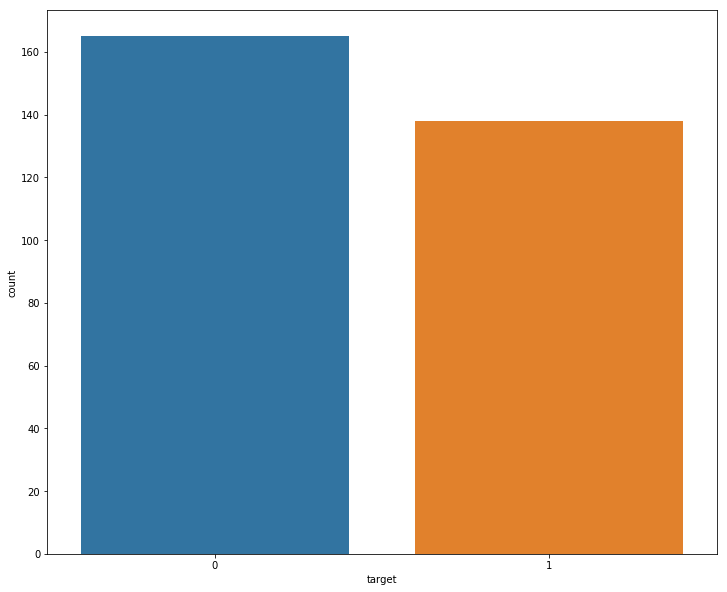

In [116]:
ax = sns.countplot(x="target", data = heart_data)

 Yeap, The dataset is almost balanced ✔✔✔✔

**2 / Does The dataset have missing values ?**

In [117]:
for col in heart_data.columns.values:
    print(heart_data[col].isnull().sum()," missing values in -",col)
    
#total missing values:
count=0
for i in heart_data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print("total missing values:",count)

0  missing values in - age
0  missing values in - sex
0  missing values in - cp
0  missing values in - trestbps
0  missing values in - chol
0  missing values in - fbs
0  missing values in - restecg
0  missing values in - thalach
0  missing values in - exang
0  missing values in - oldpeak
0  missing values in - slope
0  missing values in - ca
0  missing values in - thal
0  missing values in - target
total missing values: 0


Yeap, there are no missing values ✔✔✔✔

So the data set is valid

Note that this dataset is very small we're more likely to **overfit** and not generalize for real world situations !<br>a bigger dataset would work well ! maybe if we collaborated with local hospitals we get more data !

# Exploratory Data Analysis

In [118]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

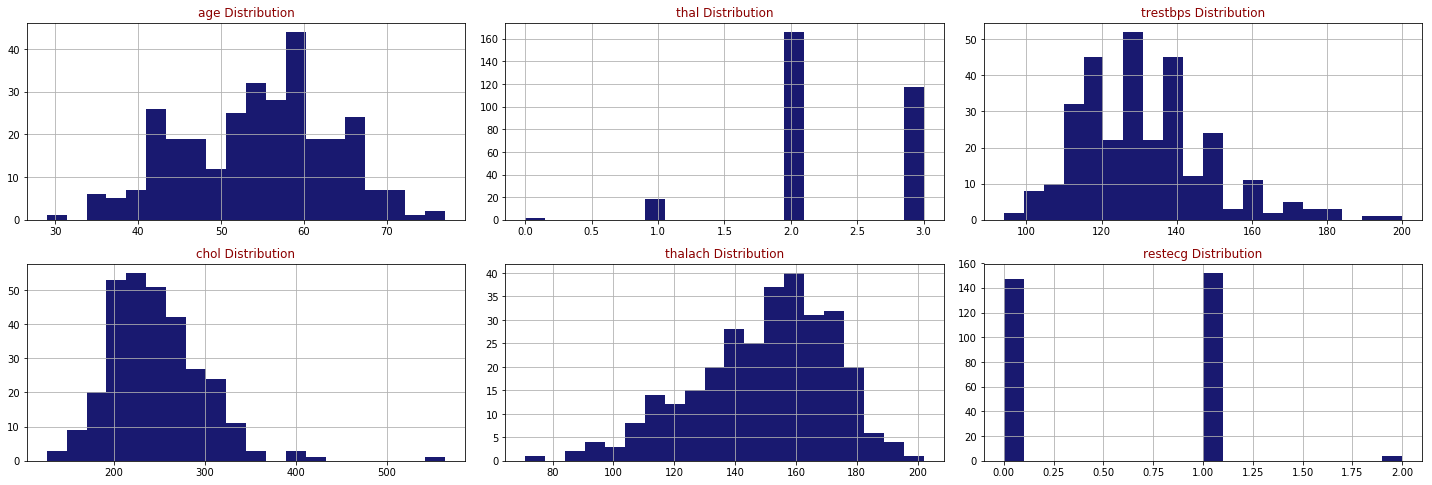

In [119]:
draw_histograms(heart_data,['age','thal','trestbps','chol','thalach','restecg'],6,3)

In [120]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.455446
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


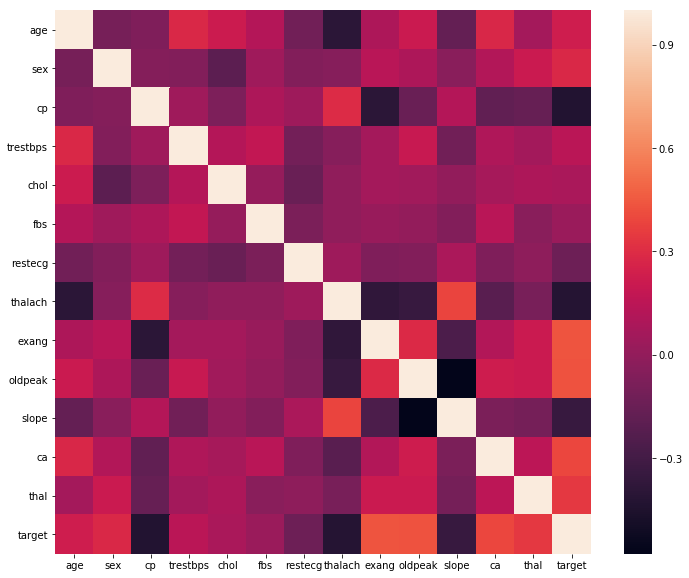

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,10
corr = heart_data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

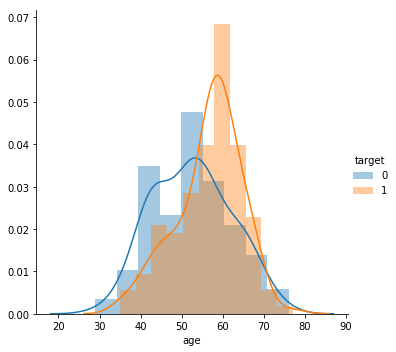

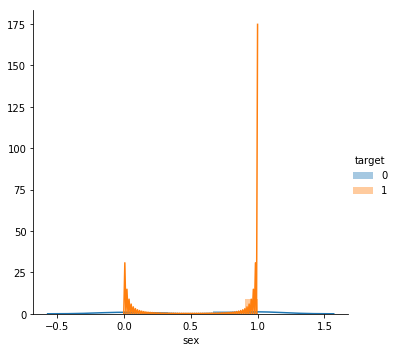

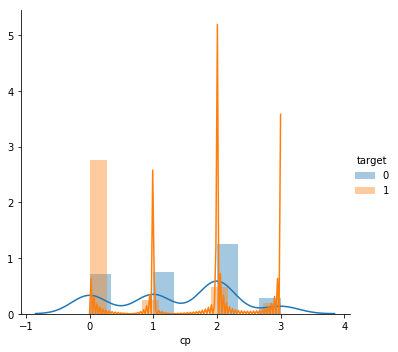

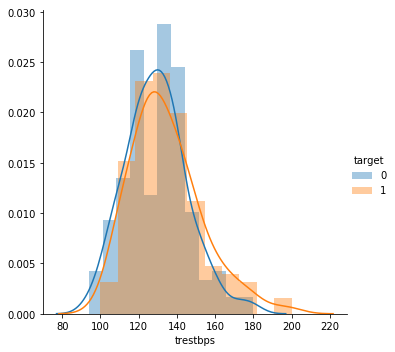

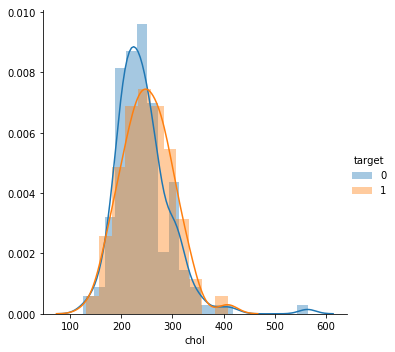

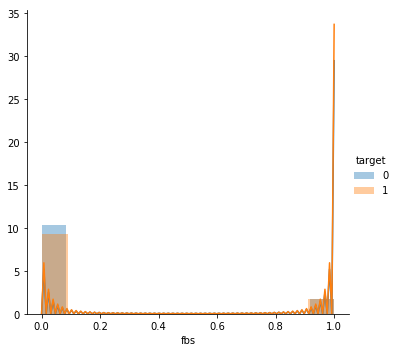

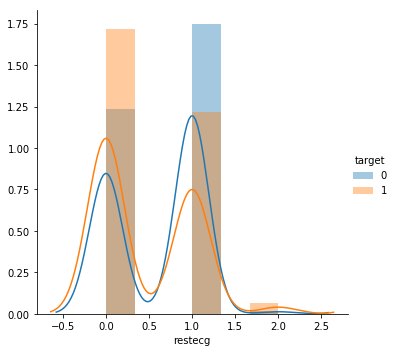

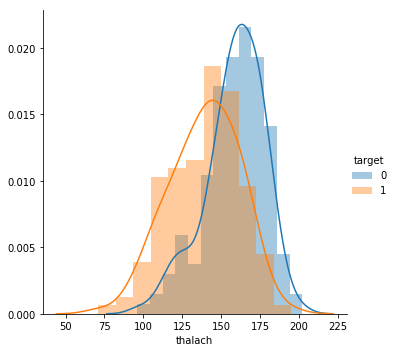

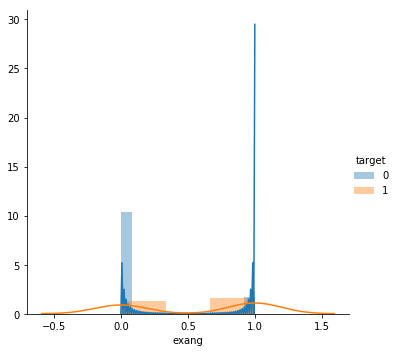

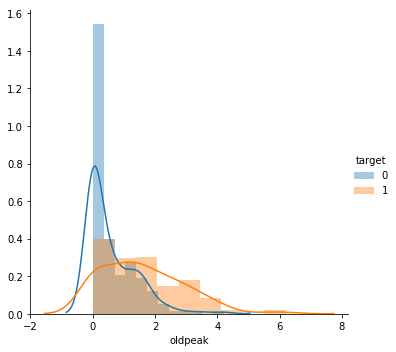

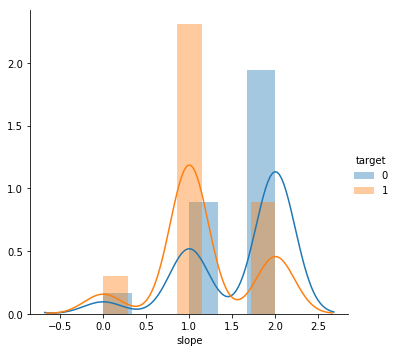

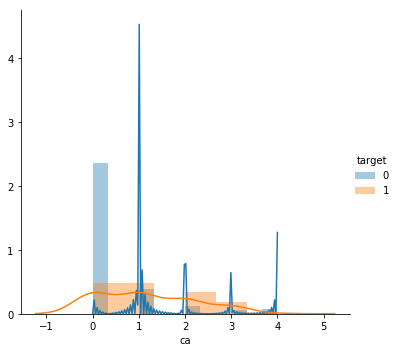

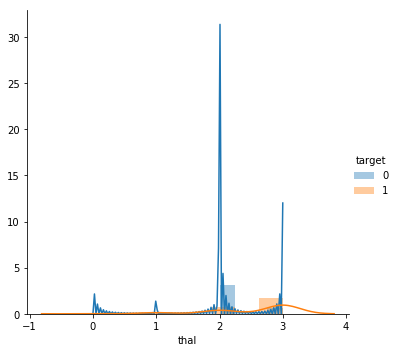

In [122]:
for i,indvar in enumerate(heart_data.columns.values):
    if indvar == 'target':
        continue
    g = sns.FacetGrid(heart_data, hue="target", height =5) \
       .map(sns.distplot, indvar) \
       .add_legend();
    plt.show();

# Key Findings

from looking at the correlation matrix we notice a high correlation between the heart disease presence and **age,sex,chest pain,exang,oldpeak,thal**